In [7]:
pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]
Note: you may need to restart the kernel to use updated packages.


Shape of dataset: (102599, 26)

Columns:
 ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Data types:
 id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                 

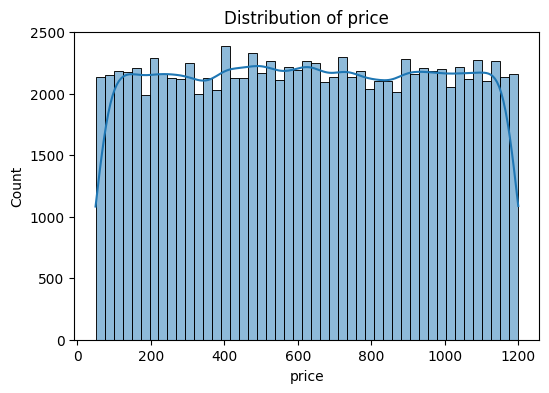

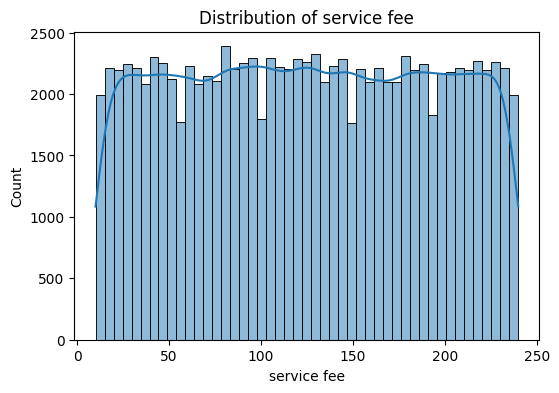

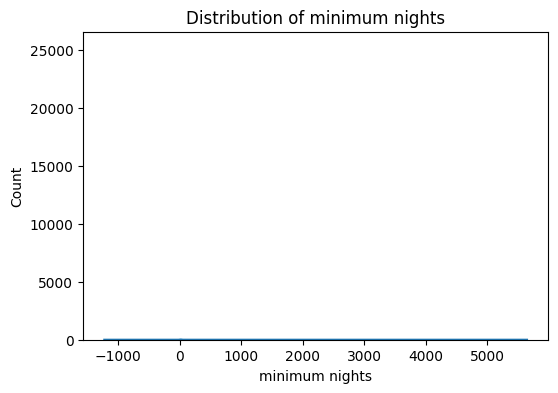

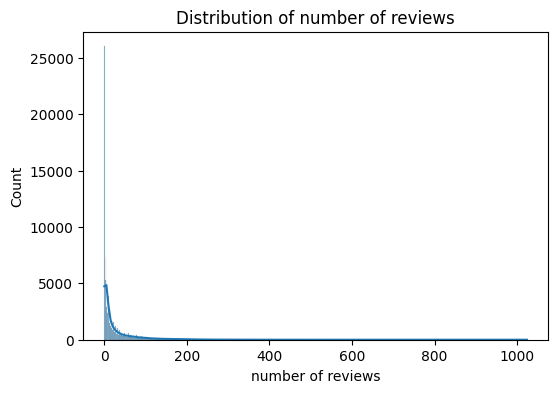

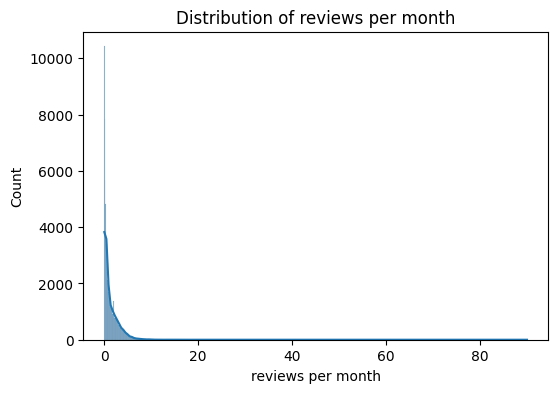

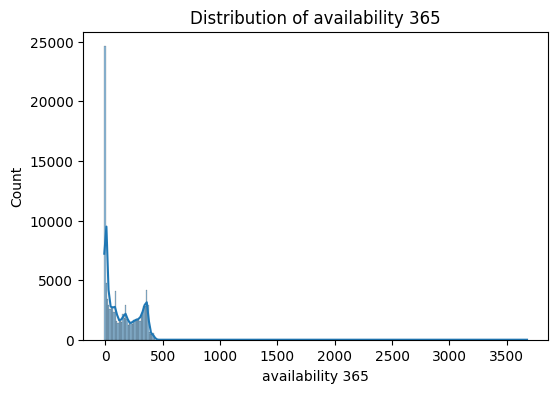

/var/folders/jm/1r7kn54s3_xfqhpxxk_k2z600000gn/T/ipykernel_1647/3756498684.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='viridis')


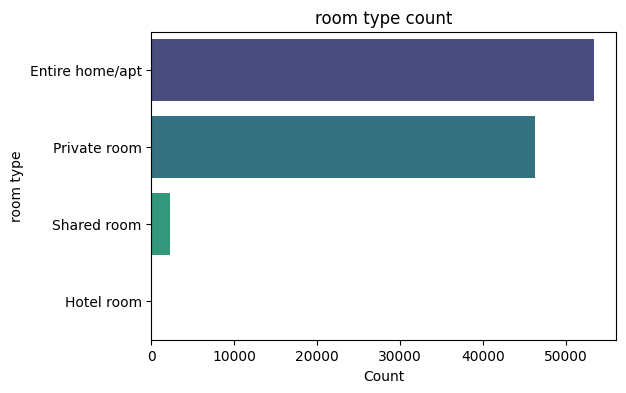

/var/folders/jm/1r7kn54s3_xfqhpxxk_k2z600000gn/T/ipykernel_1647/3756498684.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='viridis')


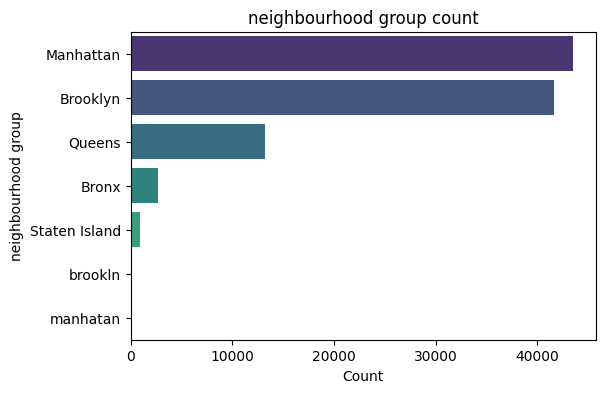

/var/folders/jm/1r7kn54s3_xfqhpxxk_k2z600000gn/T/ipykernel_1647/3756498684.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='viridis')


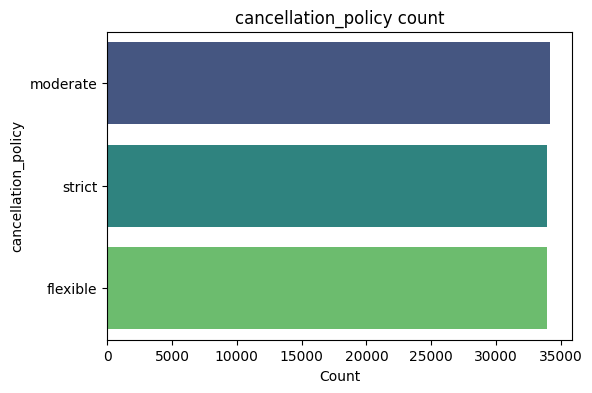

/var/folders/jm/1r7kn54s3_xfqhpxxk_k2z600000gn/T/ipykernel_1647/3756498684.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='viridis')


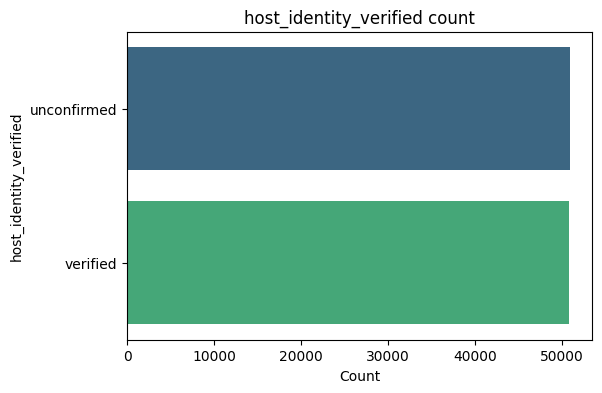

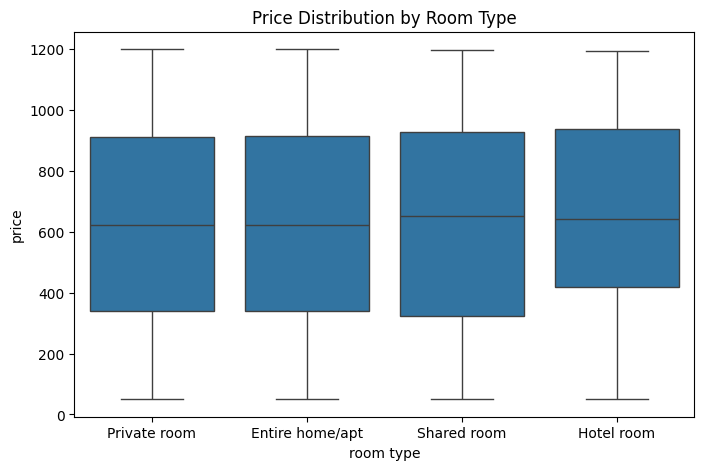

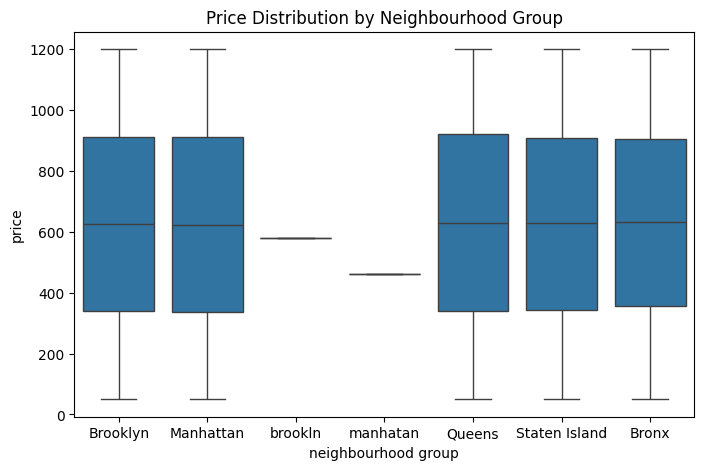

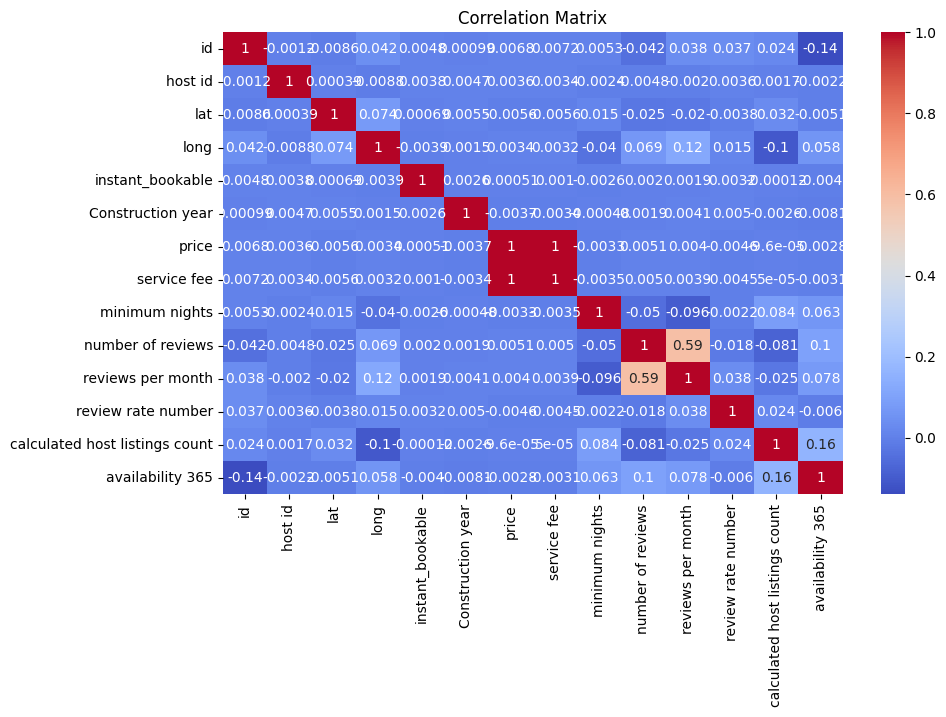

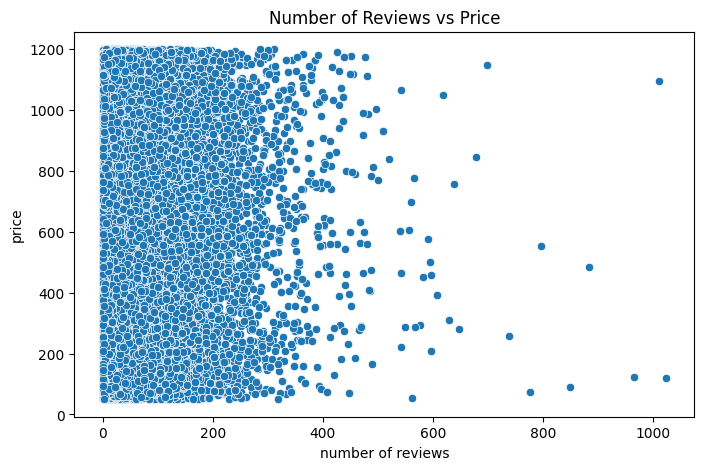

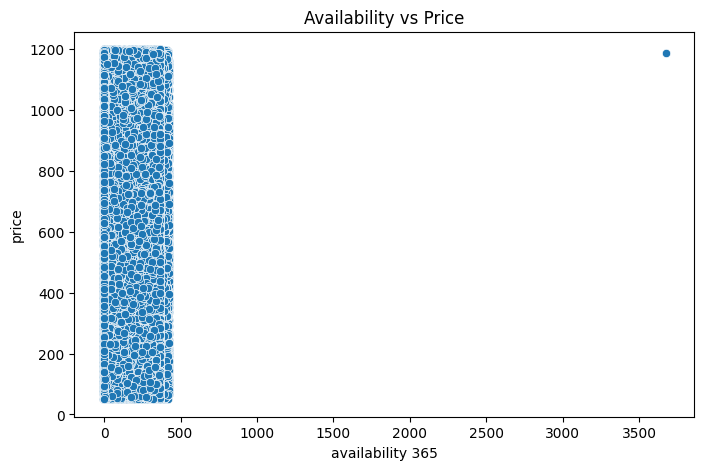

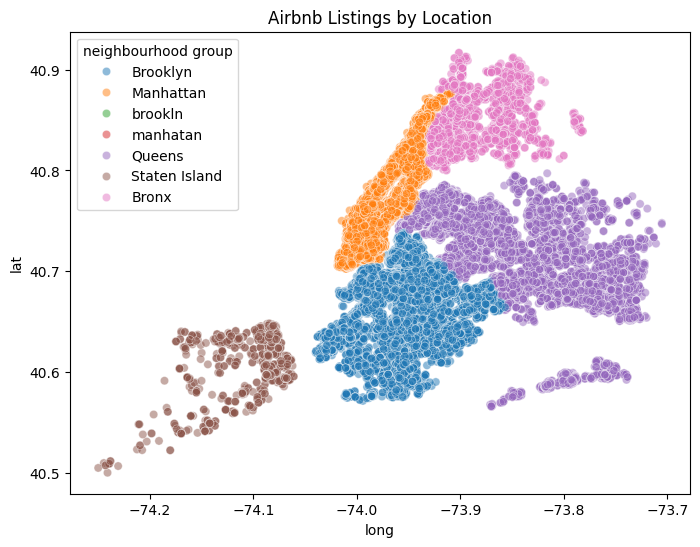

✅ EDA Complete!

Insights to Observe:
1. Which neighbourhood group has the highest number of listings?
2. Which room type dominates the market?
3. Average and median price distribution.
4. Correlation between price, reviews, and availability.
5. Geographical concentration of listings.



In [8]:
# =========================
# Airbnb EDA Full Script
# =========================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = file_path = r"/Users/ramesh/Desktop/1730285881-Airbnb_Open_Data.xlsx"

df = pd.read_excel(file_path)

# -------------------------------
# 1. Basic Dataset Information
# -------------------------------
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# -------------------------------
# 2. Descriptive Statistics
# -------------------------------
print("\nSummary statistics:\n", df.describe(include='all'))

# -------------------------------
# 3. Data Cleaning Checks
# -------------------------------
# Duplicate check
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates (optional)
df.drop_duplicates(inplace=True)

# -------------------------------
# 4. Univariate Analysis
# -------------------------------
# Plot distribution of numerical features
num_features = ['price', 'service fee', 'minimum nights', 
                'number of reviews', 'reviews per month', 
                'availability 365']

for feature in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# -------------------------------
# 5. Categorical Feature Analysis
# -------------------------------
cat_features = ['room type', 'neighbourhood group', 'cancellation_policy', 'host_identity_verified']

for feature in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='viridis')
    plt.title(f'{feature} count')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

# -------------------------------
# 6. Price Analysis
# -------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='room type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='neighbourhood group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

# -------------------------------
# 7. Correlation Analysis
# -------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# -------------------------------
# 8. Reviews and Availability
# -------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x='number of reviews', y='price', data=df)
plt.title('Number of Reviews vs Price')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='availability 365', y='price', data=df)
plt.title('Availability vs Price')
plt.show()

# -------------------------------
# 9. Geo Analysis (Latitude & Longitude)
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x='long', y='lat', hue='neighbourhood group', data=df, alpha=0.5)
plt.title('Airbnb Listings by Location')
plt.show()

# -------------------------------
# 10. Key Insights Summary
# -------------------------------
print("✅ EDA Complete!")
print("""
Insights to Observe:
1. Which neighbourhood group has the highest number of listings?
2. Which room type dominates the market?
3. Average and median price distribution.
4. Correlation between price, reviews, and availability.
5. Geographical concentration of listings.
""")
